In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

In [2]:
data = pd.read_fwf('variable.dat')
#data

In [3]:
data.columns=(['time_days', 'magnitude', 'error'])
data

,time_days,magnitude,error
0,5295.55342,15.419,0.004
1,5447.88508,15.483,0.004
2,5459.85292,15.577,0.004
3,5473.89486,15.171,0.004
4,5487.80873,15.157,0.004
...,...,...,...
258,7102.53897,15.496,0.004
259,7103.55263,15.519,0.004
260,7137.51329,15.167,0.004
261,7332.76368,15.273,0.004


In [4]:
time = data.time_days
magn = data.magnitude
uncert = data.error
dy = uncert

In [5]:
fontsize = 14
plt.rcParams["font.size"] = fontsize
plt.rcParams["axes.titlesize"] = fontsize

Text(0, 0.5, 'Power')

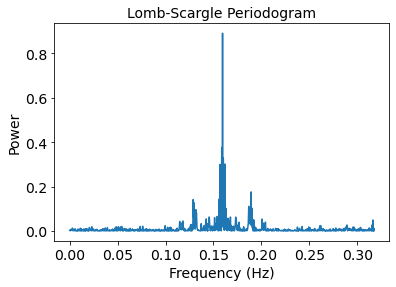

In [6]:
frequency, power = LombScargle(time, magn).autopower()
plt.plot(frequency, power) 
plt.title('Lomb-Scargle Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [7]:
"""To know the accurate frequency of the pick, we should first identify the maximum argument of power, and then
use this index to find the correspondent frequency"""
np.argmax(power) # to find the maximum argument of the power so that we can identify the position of the pick

1651

In [8]:
"""The frequency we are looking for is:
"""
print(frequency[1651]) # prints the frequency value of the pick

0.15947373724646446


In [9]:
freq = frequency[1651]
freq

0.15947373724646446

In [10]:
"""After extrating the frequency that correspondes to the pick in the previous graphic, now we can calculate the
it's related period."""

T = 1 / freq # using the frequency to calculate the periodo
T

6.2706249772933695

Text(0, 0.5, 'Magnitude')

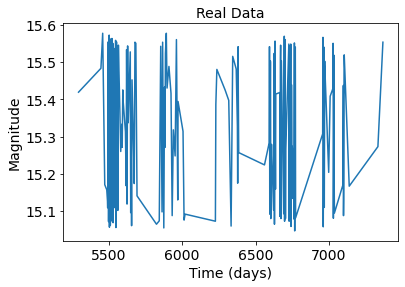

In [11]:
"""When we plot the real data it looks messy, look the following graphic:"""

plt.plot(time, magn) # plot of the real data
plt.title("Real Data")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")

In [12]:
"""When we plot the real data it looks messy, look the following graphic:"""
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(30, 10)

plt.scatter(time, magn) # plot of the real data
plt.title("Real Data")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.xlim(5490,5520)

NameError: name 'matplotlib' is not defined

In [ ]:
# This algorithm computes the Lomb-Scargle Periodogram.
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.optimize import curve_fit  
wmin = 1.0e-04                 # minimum frequency 
wmax = 5.0e-02              # maximum frequency
freq = np.linspace(wmin,wmax,5000)
from astropy.stats import LombScargle
def func(x, a0, a1):
  return a0 + a1*x
#def func(x, a0, a1, a2, a3, a4, a5):
#  return a0 + a1*x + a2*x*x+ a3*x**3 + a4*x**4 + a5*x**5
#dy = 0.1
#t,A,B,C,D,E,F,dyy = np.loadtxt('methanol_peaks02.csv', unpack = True)
#B,t = np.loadtxt('merged-file1', unpack = True)
B = magn
t = time
#ts = data[1:,i]
n = len(B)
m = len(t)
tsnew = np.empty(m)
dy = uncert#np.full(m,0.1)
p0 = [10, -0.001]
popt, pcov = curve_fit(func, t, B, p0)
#print(popt)
fitfunc2 = func(t, popt[0], popt[1])
for j in range(0,len(B)):
    tsnew[j] = B[j] - fitfunc2[j]
ls = LombScargle(t,tsnew,dy)
nu, power = ls.autopower()
power = LombScargle(t,tsnew,dy).power(freq)
fileout = open("merged-file","w")
print(1.0e0/freq[np.argmax(power)])
print(freq[np.argmax(power)])
pmax = (max(power))
#print(ls.false_alarm_probability(power.max()))
probabilities = [0.1, 0.05, 0.001]
#plevel = (ls.false_alarm_level(probabilities))
#plt.axes().set_aspect('1')
plt.clf()
plt.cla()
plt.xlim(wmin,wmax)
#plt.ylim(15,52)

plt.xlabel('Frequency (day$^{-1}$)',fontsize=18)
plt.ylabel('Power',fontsize=18)
#plt.plot(freq,power1,'--', color='b',label='OH 1667 MHz; P=216.1 days')
#plt.plot(freq,power3, '-.',color='r',label='OH 1665 MHz; P=215.9 days')
plt.plot(freq,power,'-', color='k',label='CH$_3$OH 6.7 GHz; P= 201 days')
#plt.axvline(freq[np.argmax(power2)], color='k', linestyle='--',linewidth=0.75)
#plt.axhline(plevel[2], color='k', linestyle='--',linewidth=0.75)
#plt.axhline(max(power3)/2, color='k', linestyle='--',linewidth=0.75)
#plt.text(0.006,y1,'Half max 1667 MHz')
#plt.text(0.006,y2,'Half max 1665 MHz')
#plt.legend(frameon=False)
#plt.savefig('LSpgrams.pdf')
#plt.savefig('LSpgrams.eps')
for i in range(n):
    fileout.write("%15.9e  %15.9e \n"% (freq[i],power[i]))
fileout.close()
plt.show()
plt.clf()
plt.cla()
plt.close()

!pwd

In [ ]:
"""The plotting of mangnitude in function of phase looks like the following"""



In [ ]:
phase = (time / T) % 1
marker = '.'
ms = 10
lw = 1
color = 'gray'
alpha = 0.6 
fig, ax = plt.subplots(figsize=(10,7))

ax.errorbar(phase,magn,yerr=dy,marker=marker,ms=ms,ls='none',lw=lw,color=color,alpha=alpha)
ax.set_title("Phased Light_Curve")
ax.set_ylabel("Magnitude")
ax.set_xlabel("Phase (days)")
plt.show()